Name: xxx

Student ID: 72405483

# Music Streaming Data Analysis
## dataset: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yamaerenay/spotify-dataset-19212020-600k-tracks")

print("Path to dataset files:", path)

Path to dataset files: /Users/sequel/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/versions/1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import os
import ast
# 归一化 画到同一张图
from sklearn.preprocessing import MinMaxScaler

path = "/Users/sequel/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/versions/1"
os.chdir(path)
# Load data
tracks_df = pd.read_csv('tracks.csv')
artists_df = pd.read_csv('artists.csv')
csv_file_path = '/Users/sequel/Library/Mobile Documents/com~apple~CloudDocs/Documents/cityu-dg/sem2/cs5481-data/assign/ass2/head_data.csv'
tracks_df.head().to_csv(csv_file_path, index=False)

In [13]:
def clean_track_data(df):
    """
    Task: Clean the tracks dataset by:
    1. Handling missing values
    2. Removing duplicates
    3. Converting data types
    4. Creating derived features
    """
    # 1. Handling missing values
    df = df.dropna()  # 删除包含缺失值的行
    # 2. Removing duplicates
    df = df.drop_duplicates()  # 删除重复的行
    # 3. Converting data types
    df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')
    # 4. Creating derived features
    # 例如，从 'duration_ms' 列创建 'duration_min' 列
    df['duration_min'] = df['duration_ms'] / 60000
    df['month'] = df['release_date'].dt.month
    df['decade'] = df['release_date'].dt.year // 10 * 10
    df['year'] = pd.to_datetime(df['release_date']).dt.year
    return df

# df = tracks_df
# # 找出所有包含缺失值的行
# missing_rows = df[df.isna().any(axis=1)]

# # 打印结果
# print("所有包含缺失值的行:")
# missing_rows
# print(len(tracks_df.columns))
cleaned_tracks = clean_track_data(tracks_df)
print("decrement is: ", len(tracks_df) - len(cleaned_tracks))

cleaned_tracks.head()
# 1922 -> 1922-01-01
# cleaned_tracks[cleaned_tracks['id'] == '0pXUGQcBxfoQXg2e7G9Wwk']

decrement is:  71


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,month,decade,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.674,0.7440,0.151,0.127,104.851,3,2.115050,2,1920,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.797,0.0000,0.148,0.655,102.009,1,1.636667,6,1920,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.994,0.0218,0.212,0.457,130.418,5,3.027333,3,1920,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.995,0.9180,0.104,0.397,169.980,3,2.948450,3,1920,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,0.989,0.1300,0.311,0.196,103.220,4,2.718000,1,1920,1922


In [14]:
def find_solo_artists(artist_name):
    """
    Task: Find artist names that don't contain collaborations
    - Should match: "Ed Sheeran", "Taylor Swift"
    - Should not match: "Ed Sheeran feat. Taylor Swift", "BTS & Coldplay"
    """
    # 定义正则表达式模式，匹配包含合作标识的字符串
    pattern = r'(feat\.| & | and |, )'
    # 使用 re.search 方法在字符串中查找匹配项
    match = re.search(pattern, str(artist_name))
    # 如果没有找到匹配项，说明是独唱艺人，返回 True；否则返回 False
    return not bool(match)

# Test the function
test_artists = [
    "Ed Sheeran",
    "BTS & Coldplay",
    "Taylor Swift feat. Ed Sheeran",
    "['Dick Haymes', 'Harry James', 'His Orchestra']"
]
for artist in test_artists:
    print(f"{artist}: {find_solo_artists(artist)}")
print("cleaning rows: ", len(cleaned_tracks))
solo_artists_df = cleaned_tracks[cleaned_tracks['artists'].apply(find_solo_artists)]
print("artist names that don't contain collaborations:",len(solo_artists_df))

Ed Sheeran: True
BTS & Coldplay: False
Taylor Swift feat. Ed Sheeran: False
['Dick Haymes', 'Harry James', 'His Orchestra']: False
cleaning rows:  586601
artist names that don't contain collaborations: 464404


In [15]:
def extract_featured_artists(track_name):
    """
    Task: Extract featured artists from track names
    - Input: "Love Yourself (feat. Justin Bieber)"
    - Output: "Justin Bieber"
    """
    # 使用正则表达式匹配不同的客串表述
    pattern = r'(?:feat\.|ft\.|featuring)\s+([^)]+)'
    match = re.search(pattern, track_name)
    return match.group(1).strip() if match else None

test_tracks = [
    "Love Yourself (feat. Justin Bieber)",
    "Stay With Me ft. Sam Smith",
    "No Featured Artist",
    "Perfect (featuring Ed Sheeran)"
]

# 测试提取功能
for track in test_tracks:
    featured_artist = extract_featured_artists(track)
    print(f"Track: {track}, Featured Artist: {featured_artist}")

Track: Love Yourself (feat. Justin Bieber), Featured Artist: Justin Bieber
Track: Stay With Me ft. Sam Smith, Featured Artist: Sam Smith
Track: No Featured Artist, Featured Artist: None
Track: Perfect (featuring Ed Sheeran), Featured Artist: Ed Sheeran


In [16]:
df = cleaned_tracks
# 筛选出数值类型的列
numeric_columns = df.select_dtypes(include='number').columns
print(numeric_columns)

# 假设你想要统计的列
selected_columns = ['duration_min', 'popularity', 'energy', 'danceability']  # 替换为你实际需要的列名
# 从数值列中筛选出你想要的列
filtered_columns = [col for col in selected_columns if col in numeric_columns]

# 设置 pandas 显示选项，避免使用科学计数法
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# 计算筛选后列的最小值、最大值和范围
min_values = df[filtered_columns].min()
max_values = df[filtered_columns].max()
ranges = max_values - min_values

# 输出结果
result = pd.DataFrame({
    '最小值': min_values,
    '最大值': max_values,
    '范围': ranges
})

print(result)

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_min', 'month', 'decade', 'year'],
      dtype='object')
              最小值   最大值    范围
duration_min  0.1  93.7  93.6
popularity    0.0 100.0 100.0
energy        0.0   1.0   1.0
danceability  0.0   1.0   1.0


In [17]:
bins = [0, 20, 40, 60, 80, 100]
time_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
test = [0, 20, 39, 59, 79, 99, 100]
res = pd.cut(test, bins=bins, labels=time_labels, right=False)
print(res)

['Very Short', 'Short', 'Short', 'Medium', 'Long', 'Very Long', NaN]
Categories (5, object): ['Very Short' < 'Short' < 'Medium' < 'Long' < 'Very Long']


In [18]:
'''
duration_min  0.1  93.7  93.6
popularity    0.0 100.0 100.0
energy        0.0   1.0   1.0
danceability  0.0   1.0   1.0
'''
def create_features(df):
    """
    Task: Create new features:
    1. Duration categories
    2. Popularity bins
    3. Audio feature combinations
    4. Text-based features
    """
    #duration_category:'Very Short', 'Short', 'Medium', 'Long', 'Very Long'
    #popularity_level:'Very Low', 'Low', 'Medium','High', 'Very High'
    #energy_dance_ratio:energy / danceability
    
    # 1. Duration categories
    # 假设 duration_ms 是表示歌曲时长的列
    bins = [0, 20, 40, 60, 80, 100]
    time_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
    df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=time_labels, right=False)

    # 2. Popularity bins
    # 假设 popularity 是表示歌曲流行度的列
    popularity_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    df['popularity_level'] = pd.cut(df['popularity'], bins=bins, labels=popularity_labels, right=False)

    # 3. Audio feature combinations
    df['energy_dance_ratio'] = df['energy'] / df['danceability']

    # 4. Text-based features
    # 这里可以根据具体需求实现文本特征提取，暂时留空
    # 例如，可以从歌曲名称或艺术家名称中提取关键词等
    return df

cleaned_tracks = create_features(cleaned_tracks)
cleaned_tracks['danceability'].min()

0.0

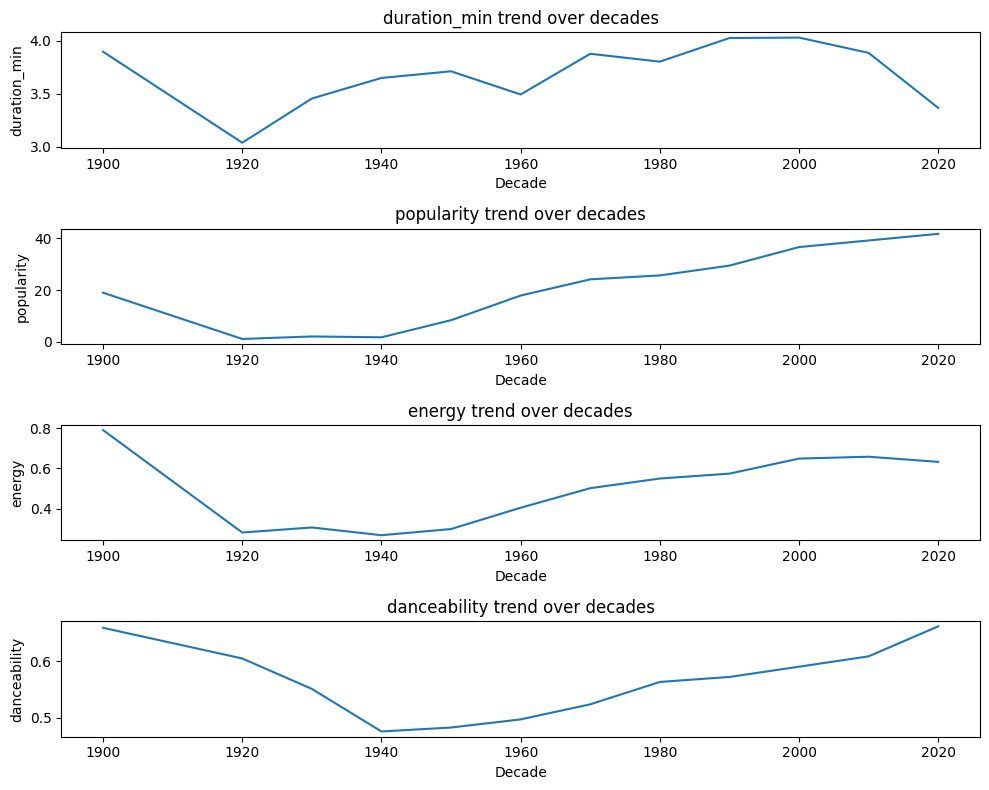

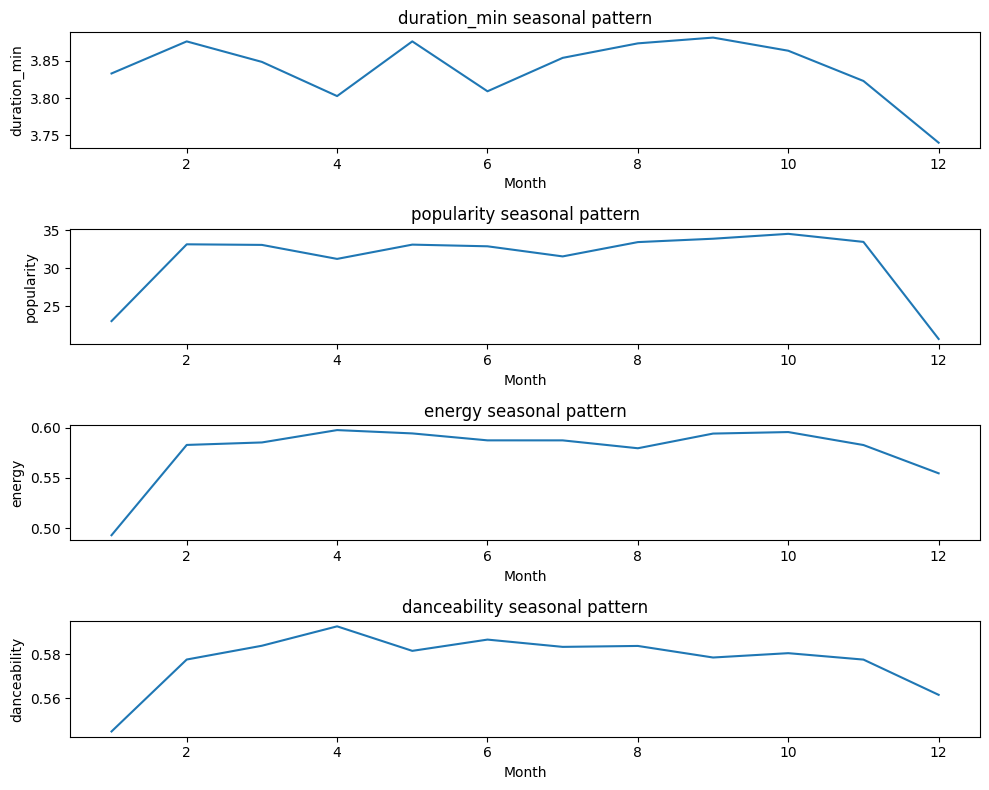

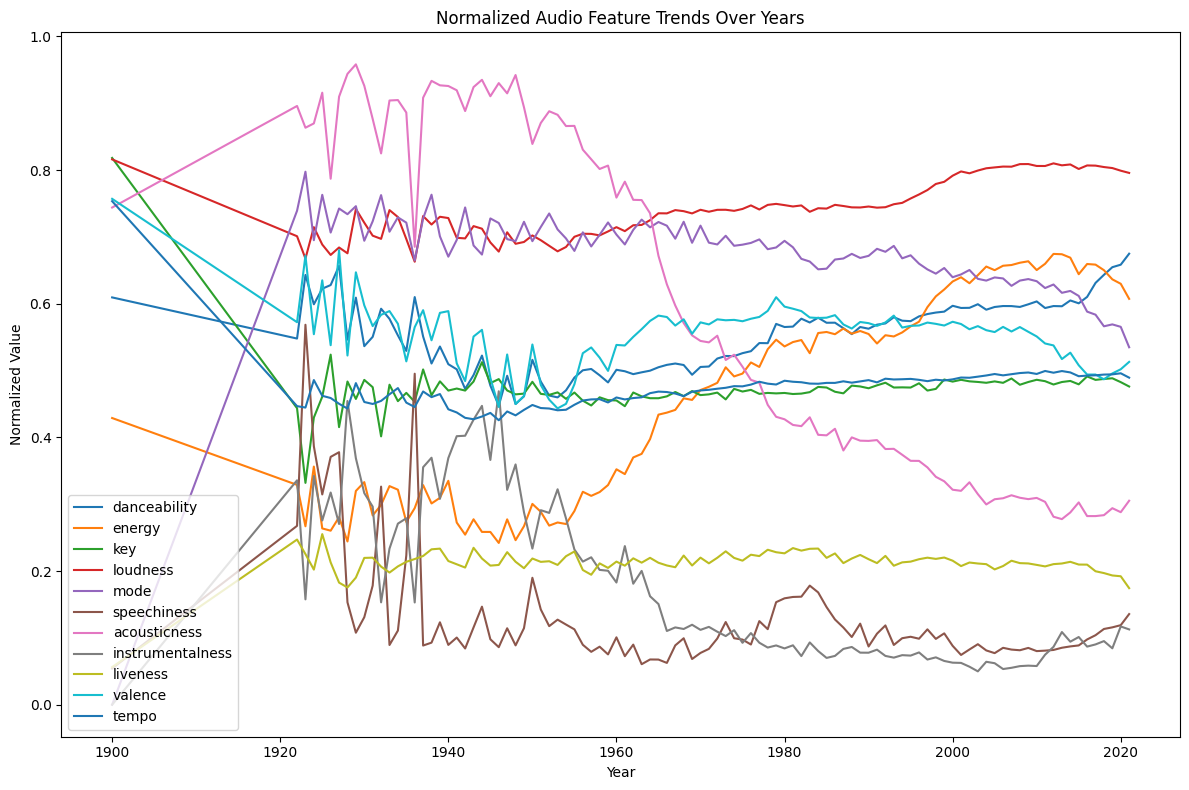

In [19]:
def plot_temporal_trends(df):
    """
    Task: Create time-based visualizations:
    1. Feature trends over decades
    2. Seasonal patterns
    3. Evolution of audio features
    """
    #1. Feature trends over decades
    features = ['duration_min', 'popularity', 'energy', 'danceability']
    fig, axes = plt.subplots(len(features), 1, figsize=(10, 8))
    for i, feature in enumerate(features):
        decade_trend = df.groupby('decade')[feature].mean()
        sns.lineplot(x=decade_trend.index, y=decade_trend.values, ax=axes[i])
        axes[i].set_title(f'{feature} trend over decades')
        axes[i].set_xlabel('Decade')
        axes[i].set_ylabel(feature)
    plt.tight_layout()

    # 2. Seasonal patterns
    seasonal_fig, seasonal_axes = plt.subplots(len(features), 1, figsize=(10, 8))
    for i, feature in enumerate(features):
        seasonal_pattern = df.groupby('month')[feature].mean()
        sns.lineplot(x=seasonal_pattern.index, y=seasonal_pattern.values, ax=seasonal_axes[i])
        seasonal_axes[i].set_title(f'{feature} seasonal pattern')
        seasonal_axes[i].set_xlabel('Month')
        seasonal_axes[i].set_ylabel(feature)
    plt.tight_layout()

    # 3. audio feature
    audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    # 特征归一化
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(df[audio_features])
    normalized_df = pd.DataFrame(normalized_data, columns=audio_features)
    normalized_df['year'] = df['year']

    # 按年份分组计算均值
    yearly_trends = normalized_df.groupby('year')[audio_features].mean()

    # 绘制变化趋势图
    plt.figure(figsize=(12, 8))
    for feature in audio_features:
        sns.lineplot(x=yearly_trends.index, y=yearly_trends[feature], label=feature)

    plt.title('Normalized Audio Feature Trends Over Years')
    plt.xlabel('Year')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
temporal_fig = plot_temporal_trends(cleaned_tracks)

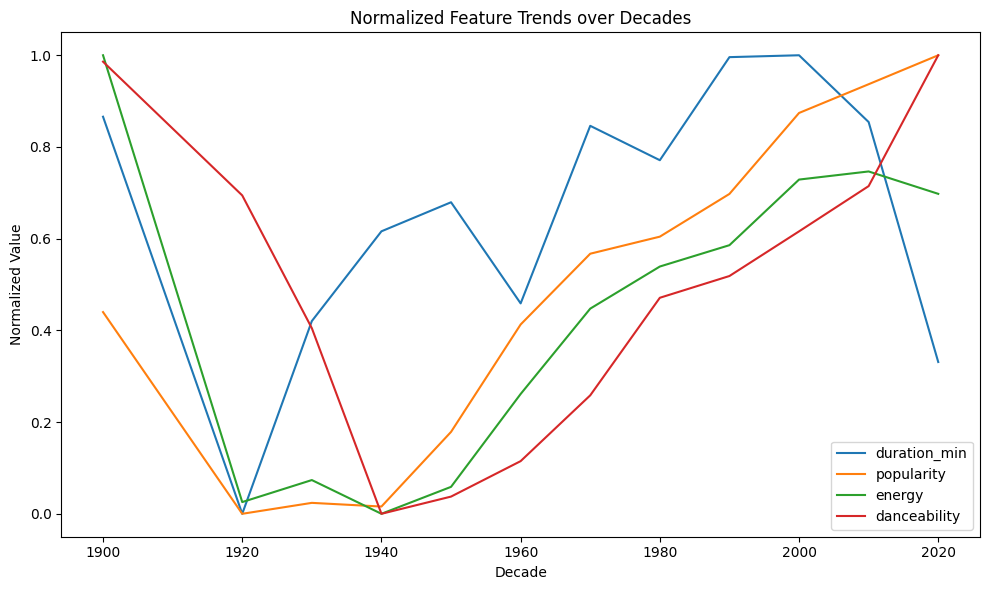

In [20]:
def plot_temporal_trends_normal(df):
    """
    Task: Create time-based visualizations:
    1. Feature trends over decades
    2. Seasonal patterns
    3. Evolution of audio features
    """
    #1. Feature trends over decades
    features = ['duration_min', 'popularity', 'energy', 'danceability']
    # 按年代分组并计算每个特征的平均值
    decade_trends = df.groupby('decade')[features].mean()
    
    # 对特征进行归一化处理
    scaler = MinMaxScaler()
    normalized_trends = scaler.fit_transform(decade_trends)
    normalized_trends = pd.DataFrame(normalized_trends, columns=features, index=decade_trends.index)

    # 创建一个新的图形
    plt.figure(figsize=(10, 6))
    
    # 绘制归一化后的特征趋势
    for feature in features:
        sns.lineplot(x=normalized_trends.index, y=normalized_trends[feature], label=feature)
    
    plt.title('Normalized Feature Trends over Decades')
    plt.xlabel('Decade')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.tight_layout()
    return plt.gcf()

# 假设 cleaned_tracks 是已经定义好的数据框
temporal_fig = plot_temporal_trends_normal(cleaned_tracks)
plt.show()

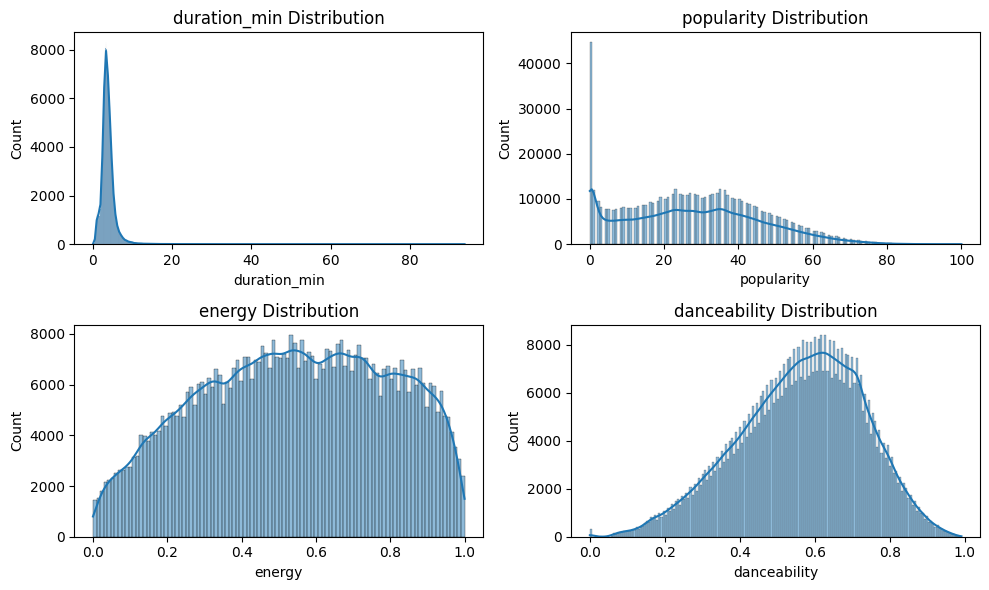

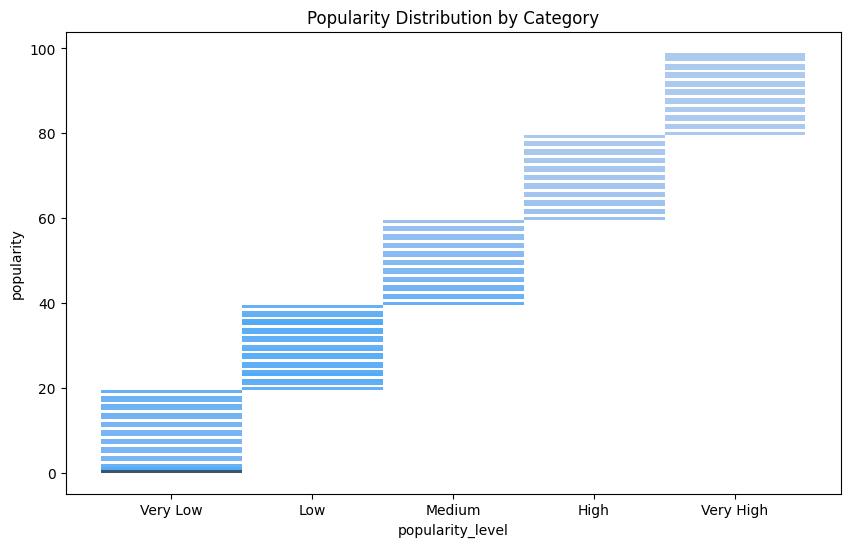

In [ ]:
def plot_feature_distributions(df):
    """
    Task: Create distribution visualizations:
    1. Multiple feature distributions
    2. Popularity distribution by category
    3. Audio feature relationships
    """
    # 1. Multiple feature distributions
    features = ['duration_min', 'popularity', 'energy', 'danceability']
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'{feature} Distribution')
    plt.tight_layout()

    # 2. Popularity distribution by category
    category_col = 'popularity_level'
    if category_col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=category_col, y='popularity', data=df)
        plt.title('Popularity Distribution by Category')
    return fig
plot_feature_distributions(cleaned_tracks)
plt.show()


In [22]:
def plot_correlation_analysis(df):
    """
    Task: Create correlation visualizations:
    1. Feature correlation heatmap
    2. Scatter plot matrix
    3. Specific feature relationships
    """
    return plt.gcf()
    
corr_fig = plot_correlation_analysis(cleaned_tracks)


<Figure size 640x480 with 0 Axes>

### Data Processing:
- Filter artists by genre
- Calculate yearly popularity
- Normalize values between 0-1
### Polygon Creation:
- Points need to form a closed shape
- Include base points
- Use proper ordering
### Key Concepts:
- Genre stacking (base_y)
- Time progression (x-axis)
- Popularity representation (height)

In [23]:
def visualize_genre_evolution(tracks_df, artists_df):
    # Convert genres and dates
    artists_df['genres'] = artists_df['genres'].apply(ast.literal_eval)
    tracks_df['year'] = pd.to_datetime(tracks_df['release_date']).dt.year
    
    # TODO: Create a dictionary to count genres
    genre_count = {}
    
    # TODO: Get top 5 genres
  
    top_genres = ...
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create color scheme
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))
    
    base_y = 0
    for idx, genre in enumerate(top_genres):
        # TODO: Get artists for this genre
        genre_artists = ...

        # TODO: Calculate popularity by year
        genre_by_year = {}

        # TODO: Create polygon points
        points = ...

        # TODO: Add polygon to plot

        # Add label
        mid_year = ...
        ax.text(...)

        base_y += 1
        
        # Set plot properties
    ax.set_xlim(...)
    ax.set_ylim(...)
    plt.xlabel('Year')
    return fig

# Create visualization
genre_fig = visualize_genre_evolution(tracks_df, artists_df)
plt.show()
    

ValueError: time data "1922" doesn't match format "%Y-%m-%d", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.